In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("encoded.csv")

In [27]:
df

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,SalePrice
0,1,65.0,8450.0,1,7,5,2003,2003,196.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208500
1,2,80.0,9600.0,1,6,8,1976,1976,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181500
2,3,68.0,11250.0,1,7,5,2001,2002,162.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223500
3,4,60.0,9550.0,1,7,5,1915,1970,0.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140000
4,5,84.0,14260.0,1,8,5,2000,2000,350.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917.0,1,6,5,1999,2000,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175000
1456,1457,85.0,13175.0,1,6,6,1978,1988,119.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210000
1457,1458,66.0,9042.0,1,7,9,1941,2006,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266500
1458,1459,68.0,9717.0,1,5,6,1950,1996,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142125


In [28]:
df["HeatingQC"].value_counts()

HeatingQC
0.0    741
4.0    428
2.0    241
1.0     49
3.0      1
Name: count, dtype: int64

<Axes: xlabel='HeatingQC', ylabel='SalePrice'>

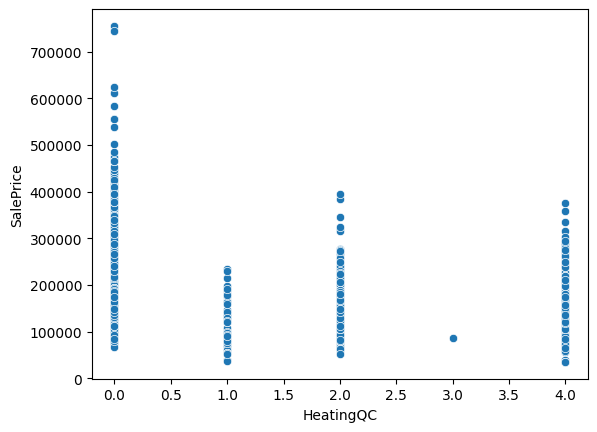

In [29]:
sns.scatterplot(x=df["HeatingQC"], y=df["SalePrice"])

(array([165., 735., 385., 147.,  21.,   4.,   2.,   0.,   0.,   1.]),
 array([ 334. ,  769.8, 1205.6, 1641.4, 2077.2, 2513. , 2948.8, 3384.6,
        3820.4, 4256.2, 4692. ]),
 <BarContainer object of 10 artists>)

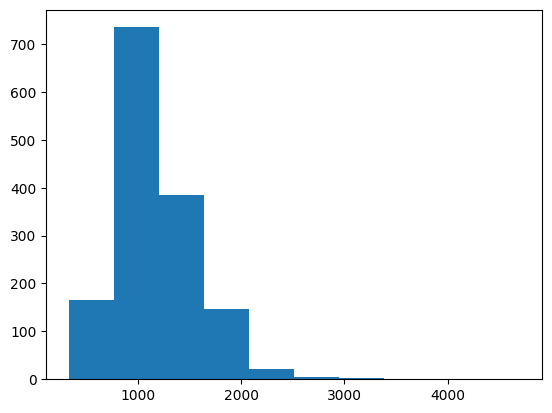

In [30]:
plt.hist(df["1stFlrSF"])

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

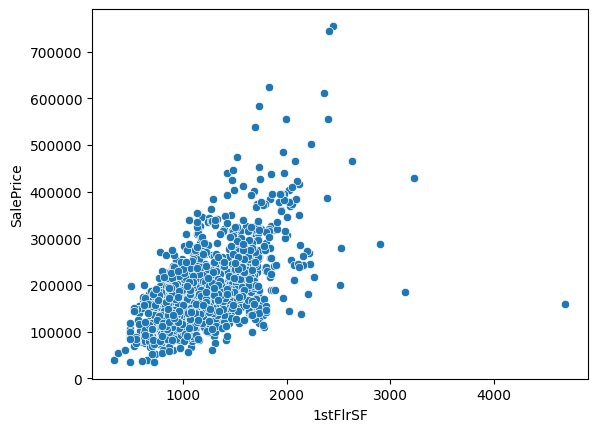

In [31]:
sns.scatterplot(x=df["1stFlrSF"], y=df["SalePrice"])

In [32]:
q1 = df["1stFlrSF"].quantile(0.025)
q3 = df["1stFlrSF"].quantile(0.975)
IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

outliers = df[(df['1stFlrSF'] < lower_bound) | (df['1stFlrSF'] > upper_bound)]
outliers

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,SalePrice
1298,1299,119.05,22698.25,1,10,5,2008,2008,610.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160000


In [33]:
# Calculate 97.5th percentile
first_flr_SF = df['1stFlrSF'].quantile(0.975)

# Cap values at the 97.5th percentile
df['1stFlrSF'] = np.where(df['1stFlrSF'] > first_flr_SF, first_flr_SF, df['1stFlrSF'])

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

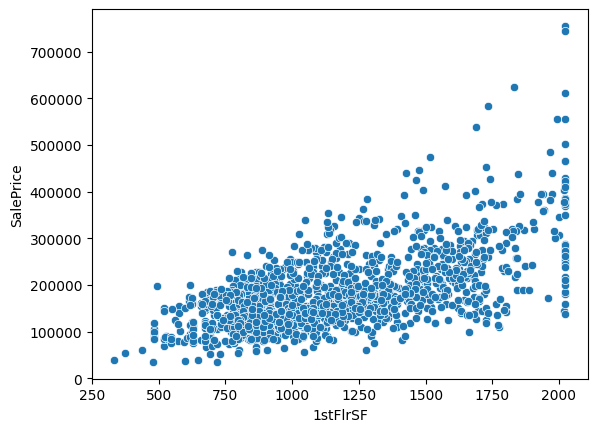

In [34]:
sns.scatterplot(x=df["1stFlrSF"], y=df["SalePrice"])

(array([ 12.,  61., 205., 326., 268., 183., 146., 118.,  78.,  63.]),
 array([ 334.  ,  503.02,  672.04,  841.06, 1010.08, 1179.1 , 1348.12,
        1517.14, 1686.16, 1855.18, 2024.2 ]),
 <BarContainer object of 10 artists>)

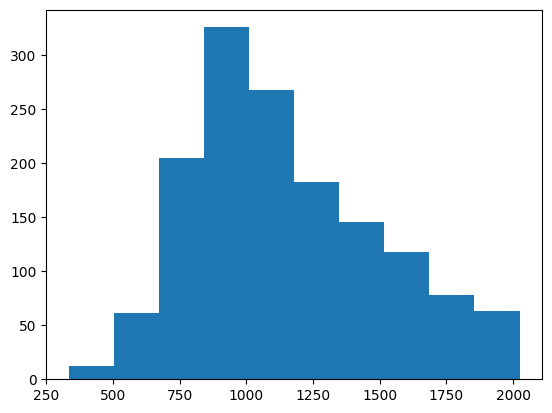

In [35]:
plt.hist(df["1stFlrSF"])

(array([832.,  32., 118., 209., 154.,  69.,  34.,   8.,   2.,   2.]),
 array([   0. ,  206.5,  413. ,  619.5,  826. , 1032.5, 1239. , 1445.5,
        1652. , 1858.5, 2065. ]),
 <BarContainer object of 10 artists>)

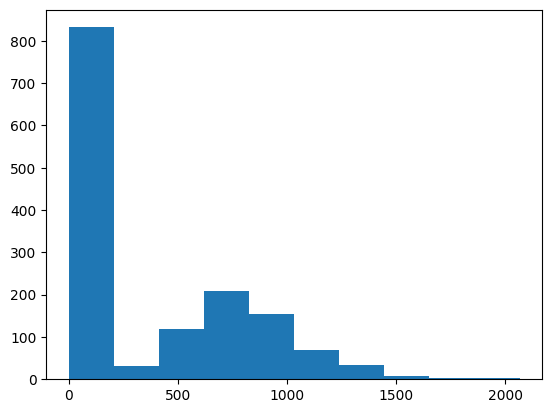

In [36]:
plt.hist(df["2ndFlrSF"])

<Axes: xlabel='2ndFlrSF', ylabel='SalePrice'>

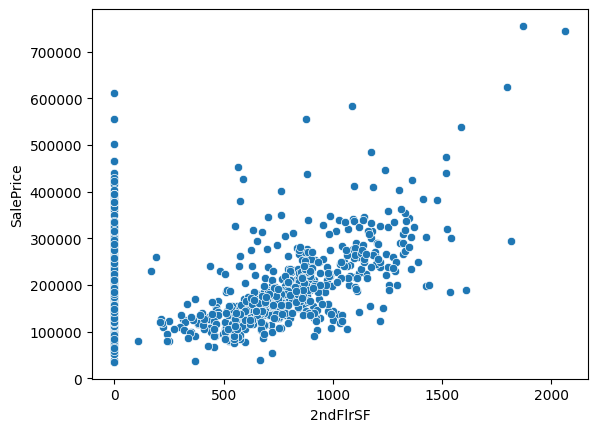

In [37]:
sns.scatterplot(x=df["2ndFlrSF"], y=df["SalePrice"])

In [38]:
q1 = df["2ndFlrSF"].quantile(0.25)
q3 = df["2ndFlrSF"].quantile(0.95)
IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

outliers = df[(df['2ndFlrSF'] < lower_bound) | (df['2ndFlrSF'] > upper_bound)]
outliers

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,SalePrice


(array([1.435e+03, 3.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        7.000e+00, 1.000e+00, 5.000e+00, 3.000e+00]),
 array([  0. ,  57.2, 114.4, 171.6, 228.8, 286. , 343.2, 400.4, 457.6,
        514.8, 572. ]),
 <BarContainer object of 10 artists>)

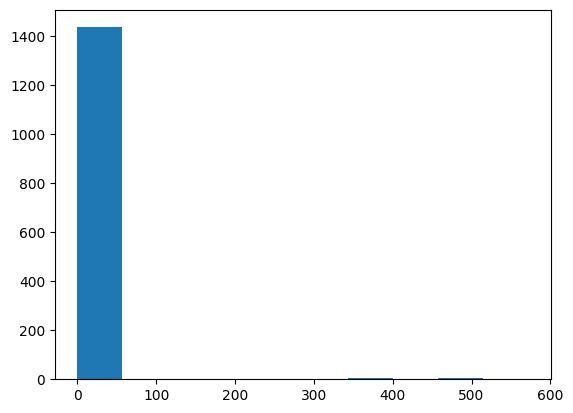

In [39]:
plt.hist(df["LowQualFinSF"])

<Axes: xlabel='LowQualFinSF', ylabel='LowQualFinSF'>

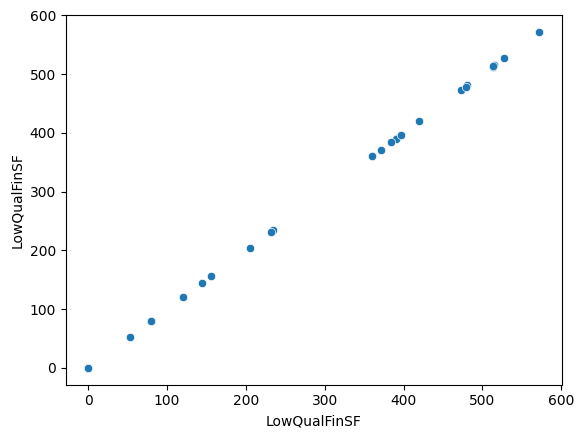

In [40]:
sns.scatterplot(x=df["LowQualFinSF"], y=df["LowQualFinSF"])

(array([107., 554., 535., 189.,  57.,  12.,   2.,   2.,   1.,   1.]),
 array([ 334. ,  864.8, 1395.6, 1926.4, 2457.2, 2988. , 3518.8, 4049.6,
        4580.4, 5111.2, 5642. ]),
 <BarContainer object of 10 artists>)

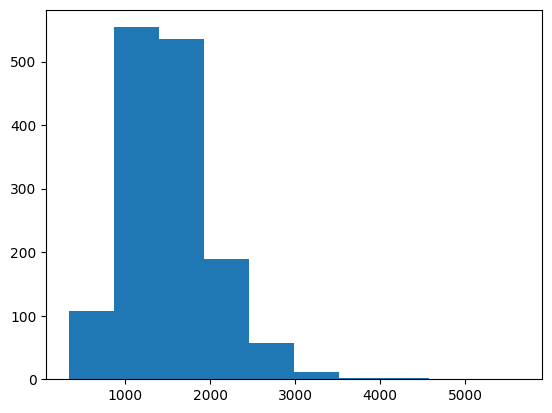

In [41]:
plt.hist(df["GrLivArea"])

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

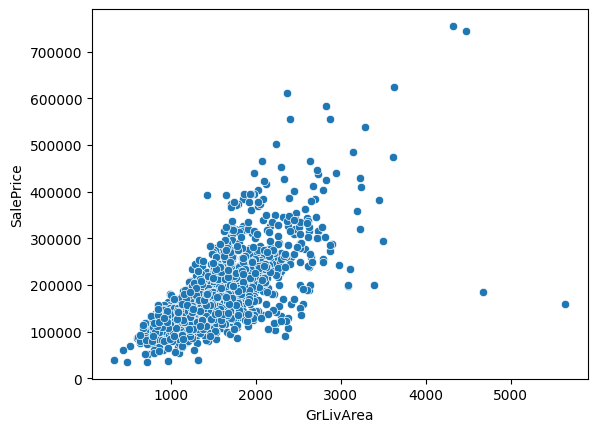

In [42]:
sns.scatterplot(x=df["GrLivArea"], y=df["SalePrice"])

In [44]:
q1 = df["GrLivArea"].quantile(0.25)
q3 = df["GrLivArea"].quantile(0.975)
IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

outliers = df[(df['GrLivArea'] < lower_bound) | (df['GrLivArea'] > upper_bound)]
outliers

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,SalePrice
1298,1299,119.05,22698.25,1,10,5,2008,2008,610.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160000


In [45]:
# Calculate 97.5th percentile
gr_liv_area = df['GrLivArea'].quantile(0.975)

# Cap values at the 97.5th percentile
df['GrLivArea'] = np.where(df['GrLivArea'] > gr_liv_area, gr_liv_area, df['GrLivArea'])

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

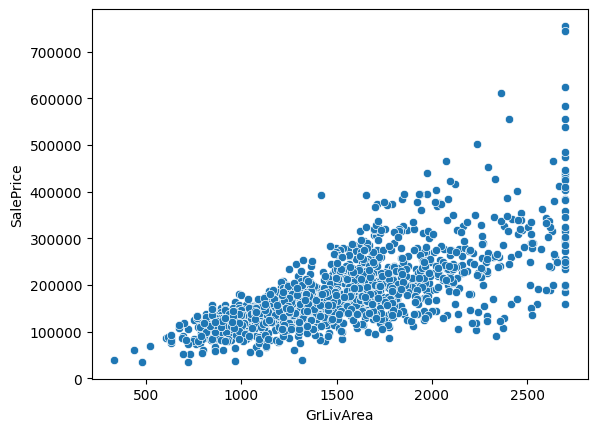

In [46]:
sns.scatterplot(x=df["GrLivArea"], y=df["SalePrice"])

In [47]:
df["BsmtFullBath"].value_counts()

BsmtFullBath
0    856
1    588
2     15
3      1
Name: count, dtype: int64

In [48]:
df["BsmtHalfBath"].value_counts()

BsmtHalfBath
0    1378
1      80
2       2
Name: count, dtype: int64

In [49]:
df["FullBath"].value_counts()

FullBath
2    768
1    650
3     33
0      9
Name: count, dtype: int64

In [50]:
df["HalfBath"].value_counts()

HalfBath
0    913
1    535
2     12
Name: count, dtype: int64

In [53]:
df["KitchenQual"].value_counts()

KitchenQual
3.0    735
2.0    586
0.0    100
1.0     39
Name: count, dtype: int64

In [55]:
df["TotRmsAbvGrd"].value_counts()

TotRmsAbvGrd
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: count, dtype: int64

In [56]:
df["Functional"].value_counts()

Functional
6.0    1360
3.0      34
2.0      31
4.0      15
0.0      14
1.0       5
5.0       1
Name: count, dtype: int64

(array([ 81., 167., 293., 500., 240., 106.,  57.,  10.,   3.,   3.]),
 array([   0. ,  141.8,  283.6,  425.4,  567.2,  709. ,  850.8,  992.6,
        1134.4, 1276.2, 1418. ]),
 <BarContainer object of 10 artists>)

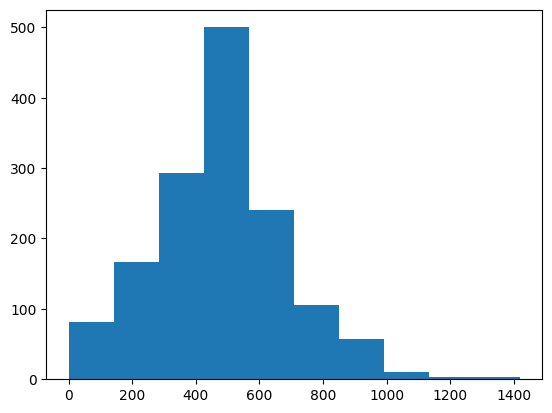

In [57]:
plt.hist(df["GarageArea"])

In [78]:
def outlier_check(column_name):

    q1 = column_name.quantile(0.025)
    q3 = column_name.quantile(0.975)
    IQR = q3 - q1

    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    outliers = df[(column_name < lower_bound) | (column_name > upper_bound)]
    return outliers

In [76]:
outlier_check(df["3SsnPorch"])

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,SalePrice
5,6,85.00,14115.0,1,5,5,1993,1995,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143000
55,56,100.00,10175.0,1,6,5,1964,1964,272.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180500
120,121,69.00,21453.0,1,6,5,1969,1969,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,180000
129,130,69.00,8973.0,1,5,7,1958,1991,85.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150000
159,160,119.05,19378.0,1,7,5,2005,2006,456.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,320000
182,183,60.00,9060.0,1,5,6,1957,2006,98.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120000
187,188,60.00,10410.0,1,5,7,1916,1987,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135000
205,206,99.00,11851.0,1,7,5,1990,1990,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180500
237,238,69.00,9453.0,1,7,7,1993,2003,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194500
258,259,80.00,12435.0,1,7,5,2001,2001,172.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,231500


In [66]:
def outlier_handler(column_name):
    # Calculate 97.5th percentile
    threshold = column_name.quantile(0.975)

    # Cap values at the 97.5th percentile
    column_name = np.where(column_name > threshold, threshold, column_name)

In [67]:
outlier_handler(df["WoodDeckSF"])

In [79]:
# Calculate age of the house at the time of sale
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

In [80]:
df["HouseAge"].value_counts()

HouseAge
1      100
0       64
4       41
2       39
3       36
      ... 
109      1
136      1
103      1
79       1
125      1
Name: count, Length: 122, dtype: int64

In [81]:
# Calculate age since last remodeling at the time of sale
df['RemodelAge'] = df['YrSold'] - df['YearRemodAdd']

In [82]:
# Calculate the age of the garage at the time of sale (assuming GarageYrBlt is available)
df['GarageAge'] = df['YrSold'] - df['GarageYrBlt']


In [83]:
# Drop the original year columns, as they have been transformed into age columns
df.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'], axis=1, inplace=True)

In [84]:
saleprice_column = df.pop("SalePrice")
df['SalePrice'] = saleprice_column
df.head()


,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,HouseAge,RemodelAge,GarageAge,SalePrice
0,1,65.0,8450.0,1,7,5,196.0,2.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5,5,5.0,208500
1,2,80.0,9600.0,1,6,8,0.0,3.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,31,31,31.0,181500
2,3,68.0,11250.0,1,7,5,162.0,2.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7,6,7.0,223500
3,4,60.0,9550.0,1,7,5,0.0,3.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,91,36,8.0,140000
4,5,84.0,14260.0,1,8,5,350.0,2.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8,8,8.0,250000


In [85]:
X = df.drop(columns=['Id', 'SalePrice'])
y = df['SalePrice']

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [87]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [88]:
lr.fit(X_train, y_train)

LinearRegression()

In [89]:
y_pred = lr.predict(X_test)

In [90]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.823311617504344